## C6. Plot distribution of the ultimate mask over all frames in eopatches

#### 0. Load required libraries, site dependant constants and utility functions.

In [91]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary (to have acces to the data and util catalogue)
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. There are two cloud masks:

1. 'INVALID_DATA_MASK_CLD_150_STR1-IS_LDS-IS_MDS'
3. 'INVALID_DATA_MASK_CLD_150_STR2-IS_LDS-IS_MDS'
2. 'INVALID_DATA_MASK_CLD_200_STR2-IS_LDS-IS_MDS'


#### 2. Define EOTask to calculate mask covarage:

In [92]:
""" Predicate that defines if a frame from EOPatch's time-series is valid or not.
Frame is valid, if the valid data fraction is above the specified threshold."""    

class CalculateMaskCoverage(EOTask):
    
    def __init__(self, input_mask_name, output_scalar_name ):
        self.input_mask_name = input_mask_name
        self.output_scalar_name = output_scalar_name
        
    def execute(self, eopatch):
        ultimate_masks = eopatch.mask[self.input_mask_name]
        mask_shape = ultimate_masks.shape
        #print(mask_shape)
        coverage_list = []
        
        for i in range(mask_shape[0]):
            array = ultimate_masks[i].squeeze()
            #print(array.shape)
            coverage = np.sum(array.astype(np.uint8)) / np.prod(array.shape)
            coverage_list.append(coverage)
        
        eopatch.add_feature(FeatureType.SCALAR_TIMELESS, self.output_scalar_name, np.asarray(coverage_list))
        return eopatch

In [93]:
calculate_invalid_data_cld_150_str1 = CalculateMaskCoverage(input_mask_name='INVALID_DATA_MASK_CLD_150_STR1-IS_LDS-IS_MDS',
                                                            output_scalar_name='COVERAGE_CLD_150_STR1-IS_LDS-IS_MDS')
calculate_invalid_data_cld_200_str2 = CalculateMaskCoverage(input_mask_name='INVALID_DATA_MASK_CLD_200_STR2-IS_LDS-IS_MDS',
                                                            output_scalar_name='COVERAGE_CLD_200_STR2-IS_LDS-IS_MDS')
calculate_invalid_data_cld_150_str2 = CalculateMaskCoverage(input_mask_name='INVALID_DATA_MASK_CLD_150_STR2-IS_LDS-IS_MDS',
                                                            output_scalar_name='COVERAGE_CLD_150_STR2-IS_LDS-IS_MDS')


#### 3. Test exemplary eo_patch

In [94]:
#eo_patch = io_utils.load_exemplary_eopatch(date_range = site.DATE_RANGES_LANDSAT_8[0], patch_id=6, random_choice=True)
#eo_patch

eo_patch = EOPatch.load('../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/3063_maxcc_0.05_x-4_y-134')

In [98]:
eo_patch = calculate_invalid_data_cld_150_str1.execute(eo_patch)
eo_patch = calculate_invalid_data_cld_200_str2.execute(eo_patch)
eo_patch = calculate_invalid_data_cld_150_str2.execute(eo_patch)
eo_patch

EOPatch(
  data: {
    DATASET_CLD_200_dil_6_str2: numpy.ndarray(shape=(9, 333, 333, 11), dtype=float32)
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(9, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape

In [99]:
eo_patch.scalar_timeless['COVERAGE_CLD_150_STR1-IS_LDS-IS_MDS']

array([0.68840913, 0.01623245, 0.        , 0.89862836, 0.99299299,
       0.        , 0.84316749, 0.4515236 , 0.01721541])

In [100]:
eo_patch.scalar_timeless['COVERAGE_CLD_150_STR2-IS_LDS-IS_MDS']

array([0.68840913, 0.0168096 , 0.        , 0.91449107, 0.99881864,
       0.        , 0.86291697, 0.46579913, 0.01721541])

In [101]:
eo_patch.scalar_timeless['COVERAGE_CLD_200_STR2-IS_LDS-IS_MDS']

array([0.68840913, 0.01512323, 0.        , 0.11580049, 0.98594991,
       0.        , 0.81008937, 0.422711  , 0.01721541])

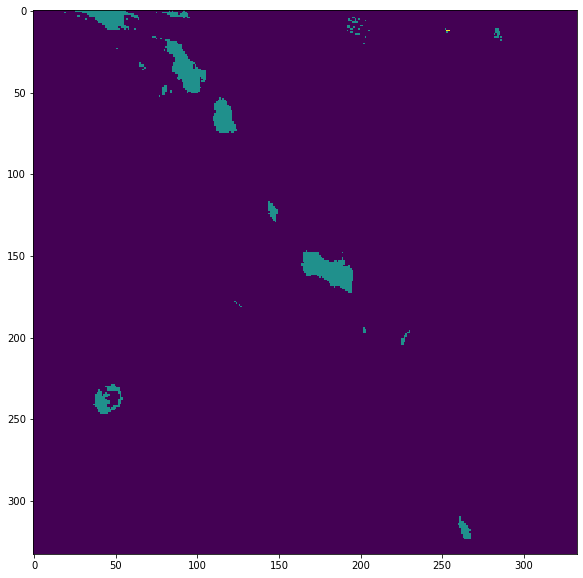

In [102]:
plot_utils.plot_timeless_mask_LANDSAT_8_max_min_val(band_idx=0, eopatch=eo_patch, mask_acces_name='WATER_MASK_ST_025_COUNT')

2013-09-21 15:32:38
Ploting...


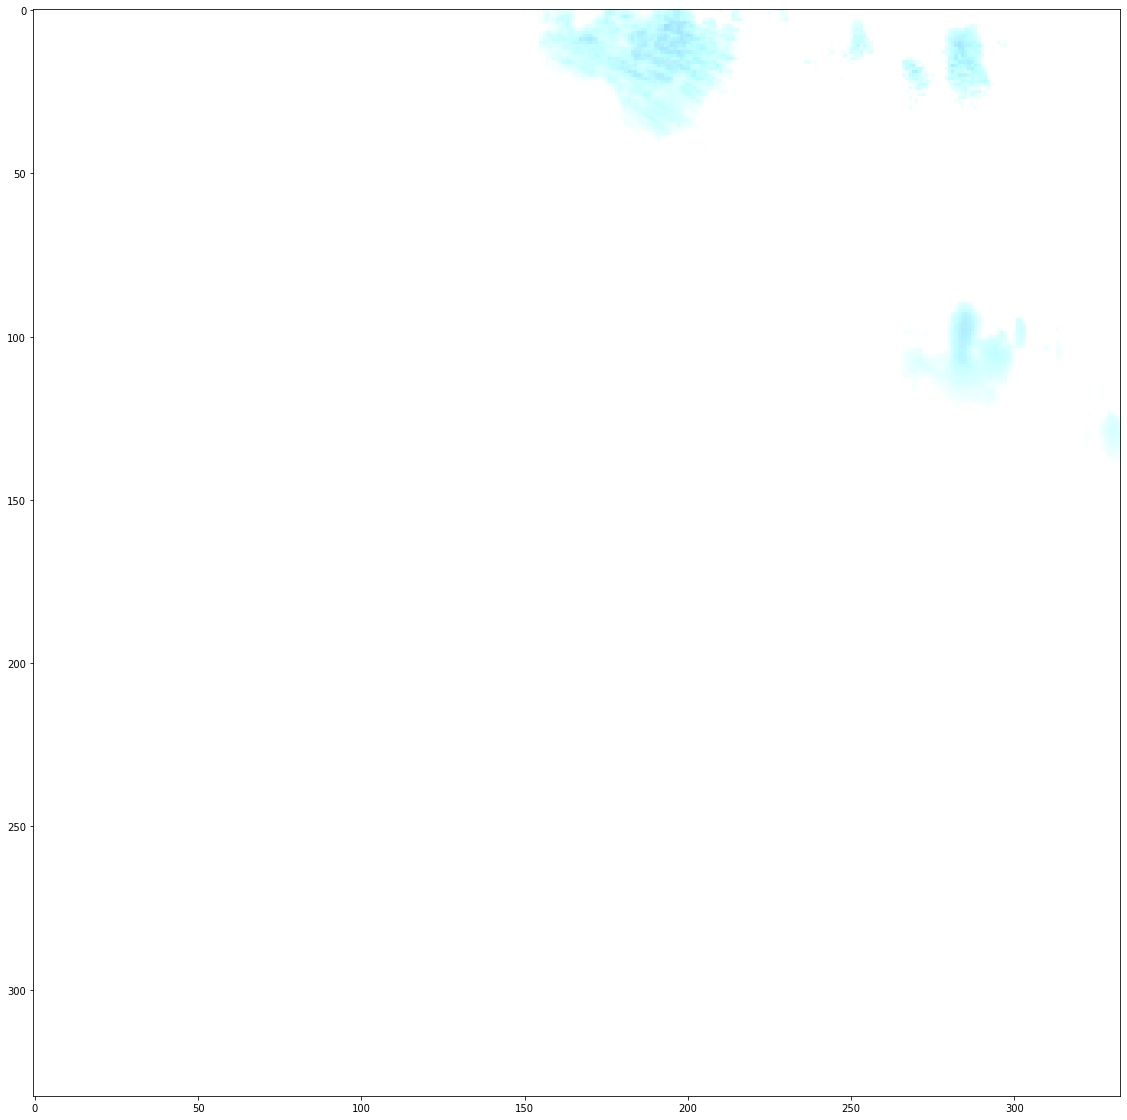

In [116]:
plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, datetime_idx=6)

2013-09-28 15:38:22
Ploting...


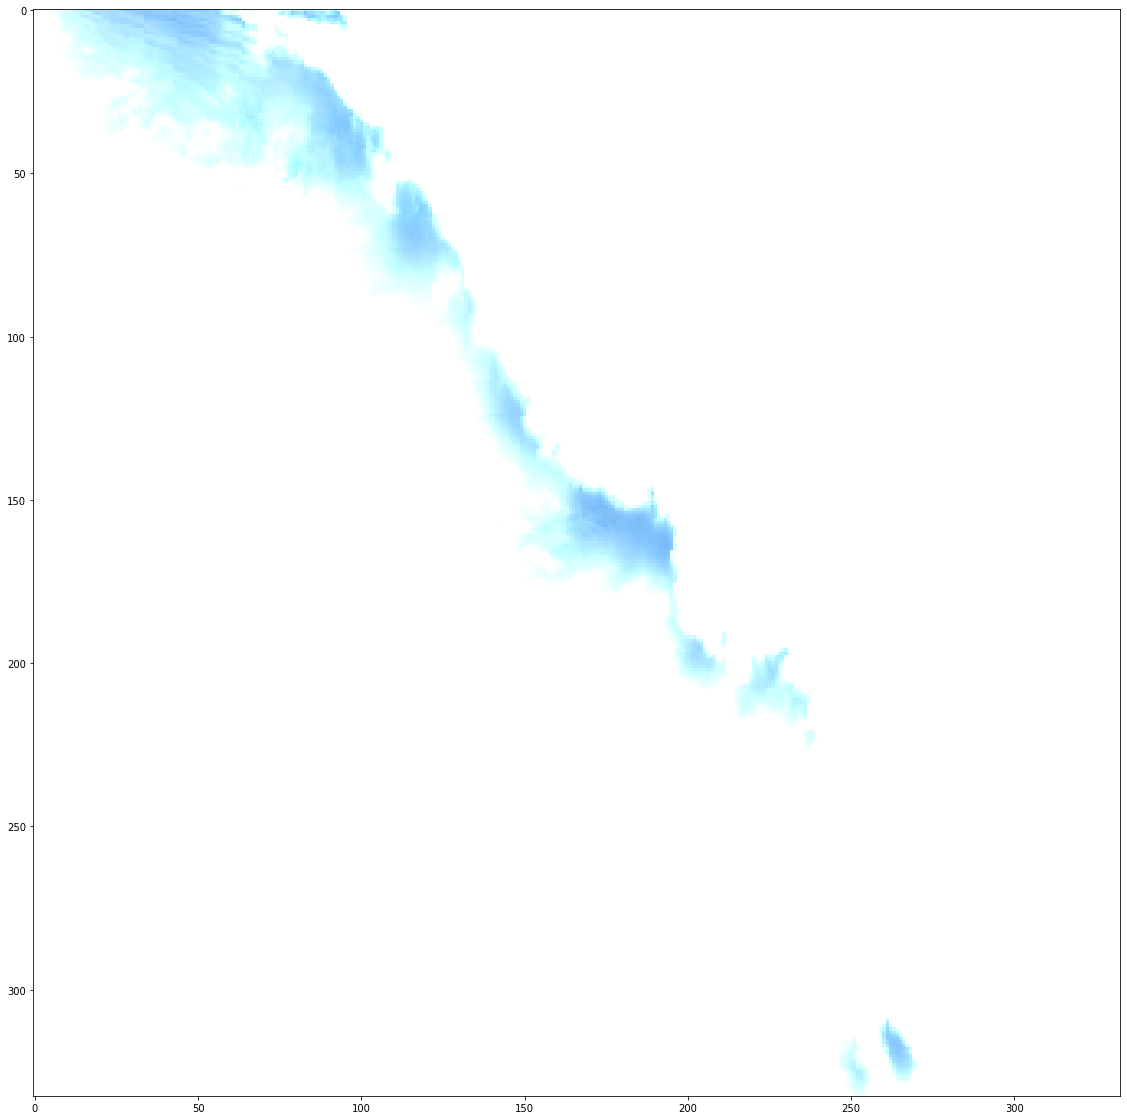

In [119]:
# check the random eopatch
plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, datetime_idx=7)

2013-09-28 15:38:22


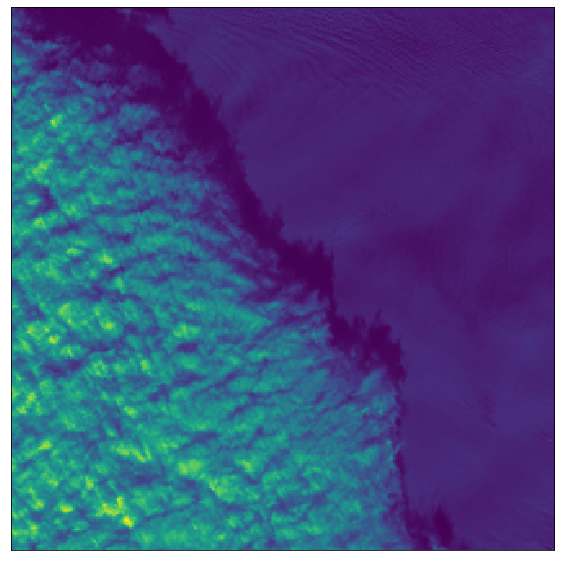

In [120]:
plot_utils.plot_single_band_LANDSAT_8(eopatch=eo_patch, band_idx= 5, data_acces_name='LANDSAT_RAW_BANDS' , datetime_idx=7 )

#### Takeout:

better to have 150 becasue in this case it detected the clouds, which were not detected in the other mask:


2013-09-28 15:38:22


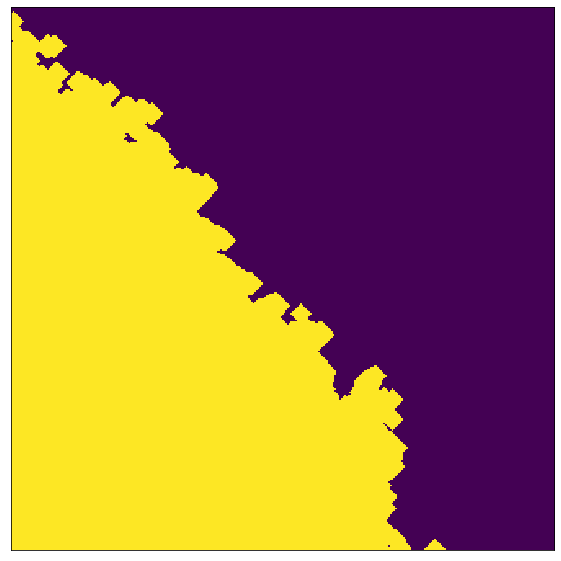

In [122]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str1', datetime_idx=7)

2013-09-28 15:38:22


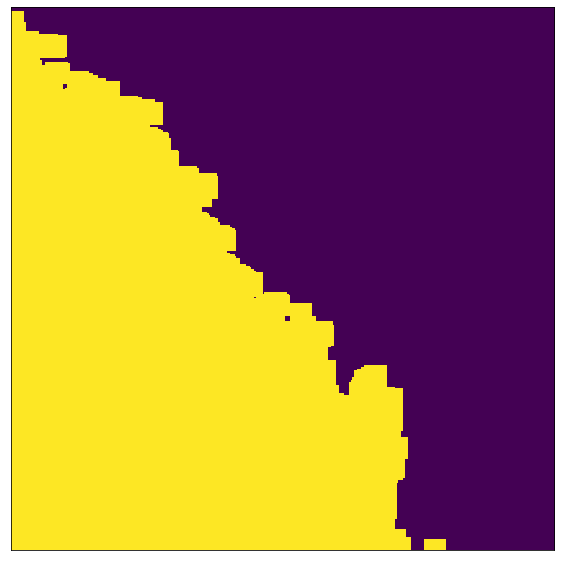

In [126]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str2', datetime_idx=7)

2013-09-28 15:38:22


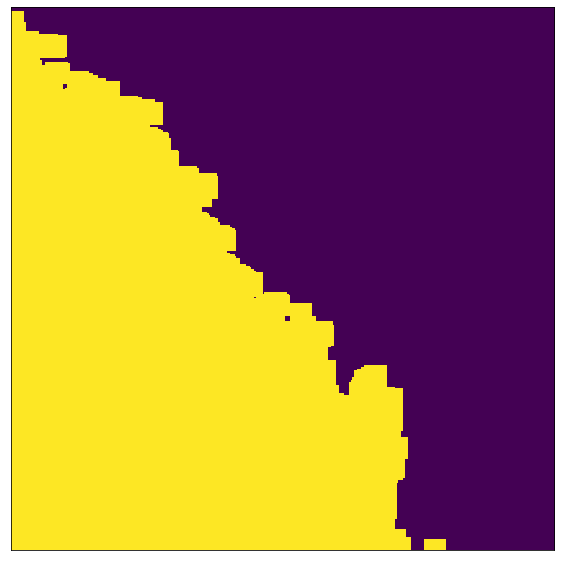

In [125]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str2', datetime_idx=7)

#### 4. Perform task on all patches

In [127]:

for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    # TASK TO LOAD AND SAVE EXISTING EOPATCHES HAS TO BE CREATED YEARLY (different directories)
    load_eotask = LoadTask(eopatches_filepath)
    save_eotask = SaveTask(eopatches_filepath, overwrite_permission=OverwritePermission.OVERWRITE_PATCH, compress_level=1)
    
    # Define the workflow
    workflow = LinearWorkflow(
    load_eotask,
    calculate_invalid_data_cld_150_str1,
    calculate_invalid_data_cld_200_str2,
    calculate_invalid_data_cld_150_str2,
    save_eotask
    )
                      
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    execution_args = []
    for eopatch_name in list_of_available_patches:
        execution_args.append({
        load_eotask: {'eopatch_folder': eopatch_name},
        save_eotask: {'eopatch_folder': eopatch_name}
        })
    
    #print(execution_args)                            
    executor = EOExecutor(workflow, execution_args, save_logs=True)
    executor.run(workers=1, multiprocess=False)

    executor.make_report()

Reading EOPatches from: ('2013-05-01', '2013-10-31')



Reading EOPatches from: ('2014-05-01', '2014-10-31')



Reading EOPatches from: ('2015-05-01', '2015-10-31')



Reading EOPatches from: ('2016-05-01', '2016-10-31')



Reading EOPatches from: ('2017-05-01', '2017-10-31')



Reading EOPatches from: ('2018-05-01', '2018-10-31')



Reading EOPatches from: ('2019-05-01', '2019-10-31')


#### 4. Get all ultimate invalid data mask

In [131]:
#all_ult_mask_coverage_150_str1 = []
all_ult_mask_coverage_150_str2 = []
all_ult_mask_coverage_200_str2 = []
error_count = 0
for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    for eo_patch_file_name in list_of_available_patches:
        filepath = eopatches_filepath+eo_patch_file_name
        print(filepath)
        eo_patch = EOPatch.load(filepath)
        try:
            all_ult_mask_coverage_150_str1.append(eo_patch.scalar_timeless['COVERAGE_CLD_150_STR1-IS_LDS-IS_MDS'])
            all_ult_mask_coverage_150_str2.append(eo_patch.scalar_timeless['COVERAGE_CLD_150_STR2-IS_LDS-IS_MDS'])
            all_ult_mask_coverage_200_str2.append(eo_patch.scalar_timeless['COVERAGE_CLD_200_STR2-IS_LDS-IS_MDS'])
        except Exception as e:
            error_count += 1
            print(repr(e))
            continue
print('Just {0} values are missing due to a  KeyError: COVERAGE_CLD_150_STR2-IS_LDS-IS_MDS'.format(error_count) )
#all_ult_mask_coverage_150_str1_list = np.vstack(all_ult_mask_coverage_150_str1)
#all_ult_mask_coverage_150_str2_list = np.vstack(all_ult_mask_coverage_150_str2)
#all_ult_mask_coverage_200_str2_list = np.vstack(all_ult_mask_coverage_200_str2)

Reading EOPatches from: ('2013-05-01', '2013-10-31')
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2969_maxcc_0.05_x-3_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2970_maxcc_0.05_x-3_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2971_maxcc_0.05_x-3_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2972_maxcc_0.05_x-3_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2973_maxcc_0.05_x-3_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2974_maxcc_0.05_x-3_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2975_maxcc_0.05_x-3_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2976_maxcc_0.05_x-3_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2977_maxcc_0.05_x-3_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2978_maxcc_0.05_x-3_y-139
../../data/EOPatc

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3181_maxcc_0.05_x-5_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3182_maxcc_0.05_x-5_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3306_maxcc_0.05_x-6_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3307_maxcc_0.05_x-6_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3308_maxcc_0.05_x-6_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3309_maxcc_0.05_x-6_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3310_maxcc_0.05_x-6_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3311_maxcc_0.05_x-6_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3312_maxcc_0.05_x-6_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/3313_maxcc_0.05_x-6_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2014_05-2014_10/331

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2976_maxcc_0.05_x-3_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2977_maxcc_0.05_x-3_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2978_maxcc_0.05_x-3_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2979_maxcc_0.05_x-3_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3059_maxcc_0.05_x-4_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3060_maxcc_0.05_x-4_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3061_maxcc_0.05_x-4_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3062_maxcc_0.05_x-4_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3063_maxcc_0.05_x-4_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3064_maxcc_0.05_x-4_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/306

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3311_maxcc_0.05_x-6_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3312_maxcc_0.05_x-6_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3313_maxcc_0.05_x-6_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3314_maxcc_0.05_x-6_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3315_maxcc_0.05_x-6_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3316_maxcc_0.05_x-6_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3469_maxcc_0.05_x-7_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3470_maxcc_0.05_x-7_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3471_maxcc_0.05_x-7_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/3472_maxcc_0.05_x-7_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2017_05-2017_10/347

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3062_maxcc_0.05_x-4_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3063_maxcc_0.05_x-4_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3064_maxcc_0.05_x-4_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3065_maxcc_0.05_x-4_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3066_maxcc_0.05_x-4_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3067_maxcc_0.05_x-4_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3068_maxcc_0.05_x-4_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3069_maxcc_0.05_x-4_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3172_maxcc_0.05_x-5_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3173_maxcc_0.05_x-5_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/317

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [136]:
all_ult_mask_coverage_150_str1_list = np.concatenate(all_ult_mask_coverage_150_str1)
all_ult_mask_coverage_150_str2_list = np.concatenate(all_ult_mask_coverage_150_str2)
all_ult_mask_coverage_200_str2_list = np.concatenate(all_ult_mask_coverage_200_str2)

In [132]:
len(all_ult_mask_coverage_150_str1)

466

#### 3. Plot distribution of ultimatly masked area, other statistics and pickle it:

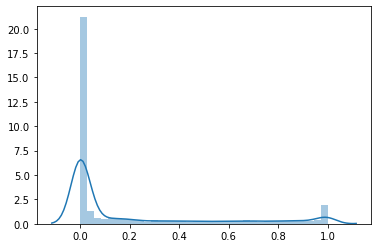

In [139]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_150_str1_list.squeeze() )

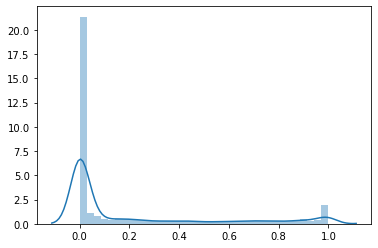

In [140]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_150_str2_list.squeeze() )

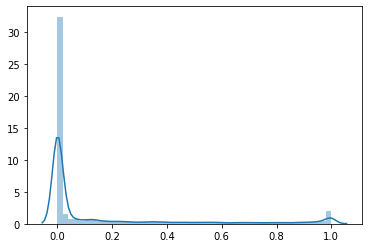

In [141]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_200_str2_list.squeeze() )

### all_ult_mask_coverage_150_str2_list

In [142]:
np.average(all_ult_mask_coverage_150_str2_list.squeeze())

0.1989788294570122

In [144]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str2_list.squeeze():
    if i < 0.1:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4541
2255


In [145]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str2_list.squeeze():
    if i < 0.05:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4316
2480


In [146]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str2_list.squeeze():
    if i < 0.01:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3913
2883


In [156]:
import pickle
PIK = "all_ult_mask_coverage_150_str2_list.dat"

data = all_ult_mask_coverage_150_str2_list.squeeze()
with open(PIK, "wb") as f:
    pickle.dump(data, f)
#with open(PIK, "rb") as f:
    #print pickle.load(f)

### all_ult_mask_coverage_150_str1_list

In [147]:
np.average(all_ult_mask_coverage_150_str1_list.squeeze())

0.1980430959666842

In [159]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str1_list.squeeze():
    if i < 0.1:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

5072
2526


In [160]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str1_list.squeeze():
    if i < 0.05:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4838
2760


In [161]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_150_str1_list.squeeze():
    if i < 0.01:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4382
3216


In [162]:
import pickle
PIK = "all_ult_mask_coverage_150_str1_list.dat"

data = all_ult_mask_coverage_150_str2_list.squeeze()
with open(PIK, "wb") as f:
    pickle.dump(data, f)
#with open(PIK, "rb") as f:
    #print pickle.load(f)

### all_ult_mask_coverage_200_str2_list

In [151]:
np.average(all_ult_mask_coverage_200_str2_list.squeeze())

0.15625544070601843

In [153]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_200_str2_list.squeeze():
    if i < 0.1:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4906
1890


In [154]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_200_str2_list.squeeze():
    if i < 0.05:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4690
2106


In [155]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_200_str2_list.squeeze():
    if i < 0.01:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

4248
2548


In [164]:
import pickle
PIK = "all_ult_mask_coverage_200_str2_list.dat"

data = all_ult_mask_coverage_200_str2_list.squeeze()
with open(PIK, "wb") as f:
    pickle.dump(data, f)
#with open(PIK, "rb") as f:
    #print pickle.load(f)